In [14]:
## Import blibliotecas por utilizar
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pandas import MultiIndex

In [21]:
## cargando los datos hacia un Pandas dataframe
dataset = pd.read_excel('data/datos_prueba.xlsx')
dataset.head(n=10)

,CLASE,MEDIDA DEL ANCHO,MEDIDA DE LA MASA
0,SALMON,34,20
1,ROBALO,36,21
2,ROBALO,40,21
3,SALMON,26,18
4,ROBALO,35,20
5,SALMON,27,18
6,SALMON,25,21
7,SALMON,27,18
8,ROBALO,35,23
9,ROBALO,31,23


In [24]:
## escalamiento  rango de 0 a 1
train_dataset = dataset
train_dataset['CLASE'] = pd.factorize(train_dataset['CLASE'])[0]
train_dataset.head(n=10)

,CLASE,MEDIDA DEL ANCHO,MEDIDA DE LA MASA
0,0,34,20
1,1,36,21
2,1,40,21
3,0,26,18
4,1,35,20
5,0,27,18
6,0,25,21
7,0,27,18
8,1,35,23
9,1,31,23


In [5]:
## salmon = 0
## robalo = 1

In [3]:
dataset.shape

(69, 3)

In [4]:
## Dividir el dataset en training y test subdatasets 70/30

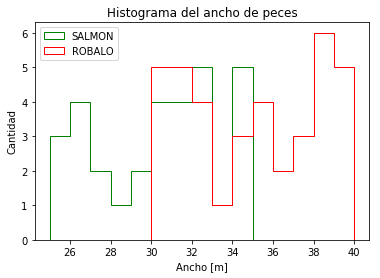

In [3]:
fig, ax = plt.subplots()
ax.hist(dataset['MEDIDA DEL ANCHO'].loc[dataset['CLASE'] == "SALMON"].values, ec='green', histtype='step', label='SALMON')
ax.hist(dataset['MEDIDA DEL ANCHO'].loc[dataset['CLASE'] == "ROBALO"].values, ec='red', histtype='step', label='ROBALO')
ax.legend(loc='upper left')
plt.title('Histograma del ancho de peces')
plt.xlabel('Ancho [m]')
plt.ylabel('Cantidad')
plt.show()

### Summary per dimension

In [4]:
summary = dataset.groupby("CLASE").agg(['mean', 'std'])
summary.head()

MEDIDA DEL ANCHO           MEDIDA DE LA MASA          
                   mean       std              mean       std
CLASE                                                        
ROBALO        34.684211  3.401949         21.052632  1.161252
SALMON        29.967742  3.177881         19.451613  1.150035

In [6]:
m = MultiIndex(levels=[['MEDIDA DEL ANCHO', 'MEDIDA DE LA MASA'], ['mean']],
           labels=[[0], [ 0]])

In [17]:
s = MultiIndex(levels=[['MEDIDA DEL ANCHO', 'MEDIDA DE LA MASA'], ['std']],
           labels=[[0], [ 0]])

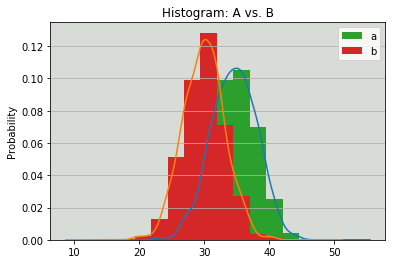

In [23]:
means = [ i[-1] for i in summary[m].values.tolist()]
stdevs = [ i[-1] for i in summary[s].values.tolist()]
dist = pd.DataFrame(
    np.random.normal(loc=means, scale=stdevs, size=(1000, 2)),
    columns=['a', 'b'])
dist.agg(['min', 'max', 'mean', 'std']).round(decimals=2)
fig, ax = plt.subplots()
dist.plot.kde(ax=ax, legend=False, title='Histogram: A vs. B')
dist.plot.hist(density=True, ax=ax)
ax.set_ylabel('Probability')
ax.grid(axis='y')
ax.set_facecolor('#d8dcd6')

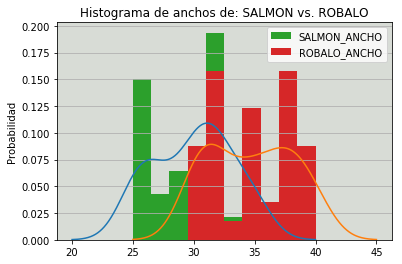

In [11]:
fig, ax = plt.subplots()
s = [dataset['MEDIDA DEL ANCHO'].loc[dataset['CLASE'] == "SALMON"], dataset['MEDIDA DEL ANCHO'].loc[dataset['CLASE'] == "ROBALO"]]
dataset_ancho = pd.concat([*s], axis=1)
dataset_ancho.columns = ["SALMON_ANCHO", "ROBALO_ANCHO"]
dataset_ancho.head()
dataset_ancho.plot.kde(ax=ax, legend=False, title='Histograma de anchos de: SALMON vs. ROBALO')
dataset_ancho.plot.hist(density=True, ax=ax)
ax.set_ylabel('Probabilidad')
ax.grid(axis='y')
ax.set_facecolor('#d8dcd6')

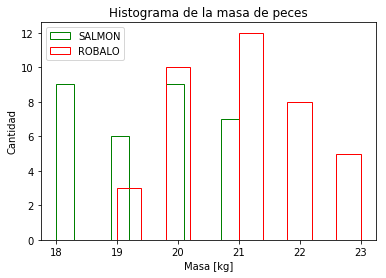

In [12]:
fig, ax = plt.subplots()
ax.hist(dataset['MEDIDA DE LA MASA'].loc[dataset['CLASE'] == "SALMON"].values, ec='green', histtype='step', label='SALMON')
ax.hist(dataset['MEDIDA DE LA MASA'].loc[dataset['CLASE'] == "ROBALO"].values, ec='red', histtype='step', label='ROBALO')
ax.legend(loc='upper left')
plt.title('Histograma de la masa de peces')
plt.xlabel('Masa [kg]')
plt.ylabel('Cantidad')
plt.show()

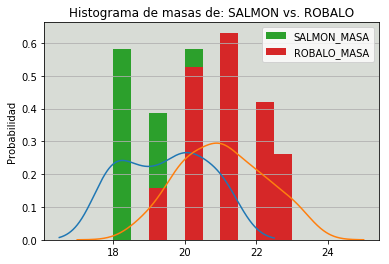

In [13]:
fig, ax = plt.subplots()
s = [dataset['MEDIDA DE LA MASA'].loc[dataset['CLASE'] == "SALMON"], dataset['MEDIDA DE LA MASA'].loc[dataset['CLASE'] == "ROBALO"]]
dataset_ancho = pd.concat([*s], axis=1)
dataset_ancho.columns = ["SALMON_MASA", "ROBALO_MASA"]
dataset_ancho.head()
dataset_ancho.plot.kde(ax=ax, legend=False, title='Histograma de masas de: SALMON vs. ROBALO')
dataset_ancho.plot.hist(density=True, ax=ax)
ax.set_ylabel('Probabilidad')
ax.grid(axis='y')
ax.set_facecolor('#d8dcd6')